# SDR operation HSP Summary
## Preprocess Procedure
### Read data from raw file

In [ ]:
import pandas as pd

raw_file = './data/SDR_Operation_HSP_20200830.xlsx'

key_col = '序号'

pre_op_df = pd.read_excel(raw_file, sheet_name='Pre-Operation', index_col=key_col)
pst_1m_df = pd.read_excel(raw_file, sheet_name='Post-Operation 1month', index_col=key_col)
pst_3m_df = pd.read_excel(raw_file, sheet_name='Post-Operation 3month', index_col=key_col)
pst_6m_df = pd.read_excel(raw_file, sheet_name='Post-Operation 6month', index_col=key_col)
pst_12m_df = pd.read_excel(raw_file, sheet_name='Post-Operation 12month', index_col=key_col)

In [ ]:
base_columns = ['姓名', '性别', '年龄', '临床诊断']
metrics_columns = list(set(pre_op_df.columns) - set(base_columns))

patient_base_df = pre_op_df[base_columns]
pre_op_df = pre_op_df[metrics_columns]
pst_1m_df = pst_1m_df[metrics_columns]
pst_3m_df = pst_3m_df[metrics_columns]
pst_6m_df = pst_6m_df[metrics_columns]
pst_12m_df = pst_12m_df[metrics_columns]

def add_suffix(origin: list, suffix: str) -> list:
    return ['_'.join([ele, suffix]) for ele in origin]

pre_op_df.columns = add_suffix(pre_op_df.columns.tolist(), 'pre_op')
pst_1m_df.columns = add_suffix(pst_1m_df.columns.tolist(), 'pst_1m')
pst_3m_df.columns = add_suffix(pst_3m_df.columns.tolist(), 'pst_3m')
pst_6m_df.columns = add_suffix(pst_6m_df.columns.tolist(), 'pst_6m')
pst_12m_df.columns = add_suffix(pst_12m_df.columns.tolist(), 'pst_12m')

data = pd.merge(patient_base_df, pre_op_df, how='left', on=key_col)
data = pd.merge(data, pst_1m_df, how='left', on=key_col)
data = pd.merge(data, pst_3m_df, how='left', on=key_col)
data = pd.merge(data, pst_6m_df, how='left', on=key_col)
data = pd.merge(data, pst_12m_df, how='left', on=key_col)

In [ ]:
object_columns = [col for col in data.columns.to_list() if str(data[col].dtype) == 'object']
print(object_columns)

data.describe()

- fix log

-- trim column 'P, Q, R, S' in sheet 'Post-Operation 3month', then update the same column titles for all other sheet

-- change value '1+' to '1.5' in sheet 'Post-Operation 12month'

### fillna
- fill na value with mean value of columns

In [ ]:
na_columns = data.columns[data.isna().any()].to_list()
na_value = {col: val for col, val in zip(na_columns, data[na_columns].mean())}
data = data.fillna(value=na_value)

In [ ]:
data.describe()

- export to file

In [ ]:
data.to_excel('./data/merged_data.xlsx')

## EDA

In [ ]:
# from matplotlib import pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# import pandas_profiling as profiling

# df = pd.read_excel('./data/merged_data.xlsx')
# profile = profiling.ProfileReport(df)

# profile.to_file('./temp/sdr_hsp_profile.html')

## Plot
### Lineplot: 78 features trends over times

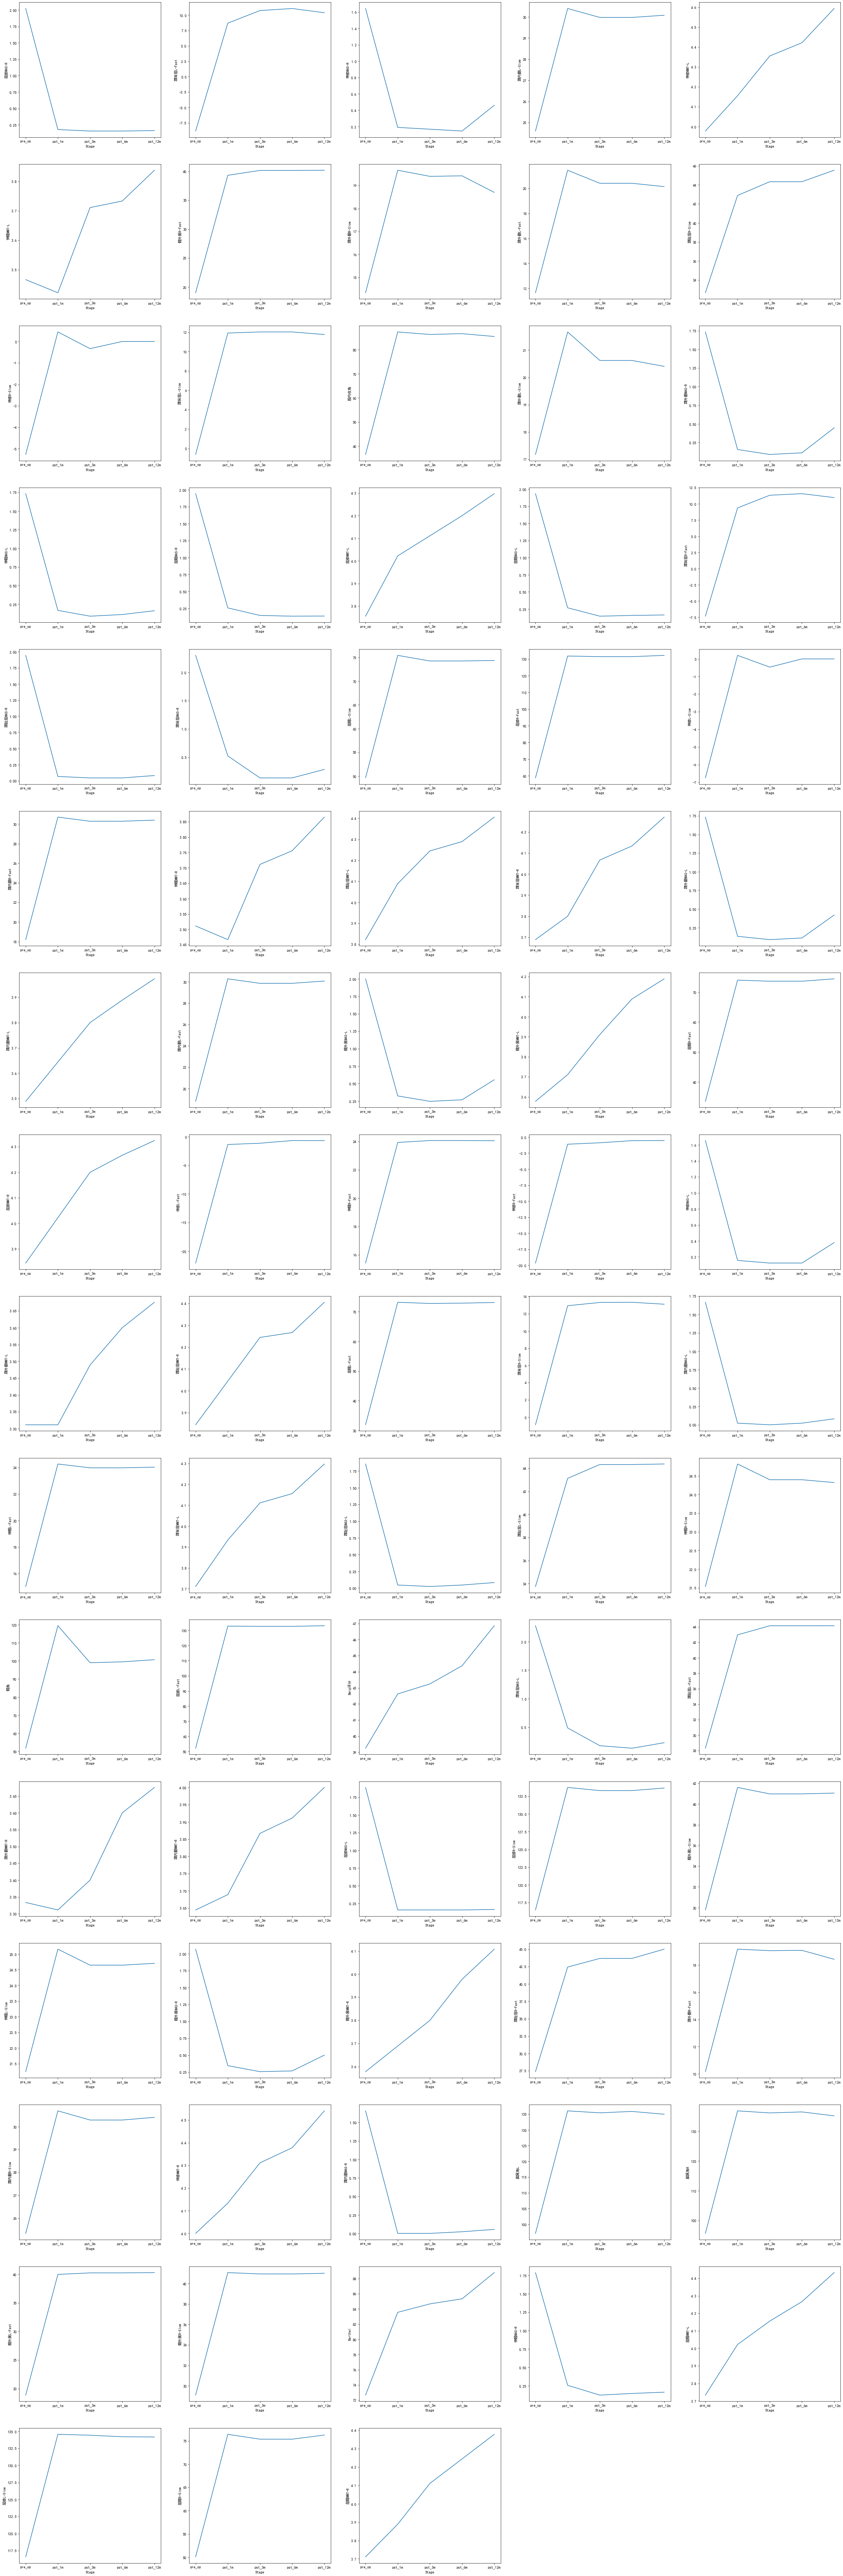

In [7]:
import math
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns


raw_file = './data/SDR_Operation_HSP_20200830.xlsx'
key_col = '序号'
pre_op_df = pd.read_excel(raw_file, sheet_name='Pre-Operation', index_col=key_col)

base_columns = ['姓名', '性别', '年龄', '临床诊断']
metrics_columns = list(set(pre_op_df.columns) - set(base_columns))
del pre_op_df

suffixes = ['pre_op', 'pst_1m', 'pst_3m', 'pst_6m', 'pst_12m']

nb_diag = len(metrics_columns)
nb_diag_cols = 5
nb_diag_rows = math.ceil(nb_diag / nb_diag_cols)

fig = plt.figure(figsize=(8 * nb_diag_cols, 8 * nb_diag_rows))
fig.tight_layout()

df = pd.read_excel('./data/merged_data.xlsx')

for idx, metrics_column in enumerate(metrics_columns):
    feature_names = ['_'.join([metrics_column, suffix]) for suffix in suffixes]
    ax = fig.add_subplot(nb_diag_rows, nb_diag_cols, idx+1)
    metrics_df = pd.DataFrame(data=zip(suffixes, df[feature_names].mean()), columns=['Stage', metrics_column])
    sns.lineplot(data=metrics_df, x='Stage', y=metrics_column, sort=False, ax=ax)

plt.show()

In [8]:
fig.savefig('./temp/lineplot.png')